# <font color=darkred>Laboratory 23: Hypothesis Testing</font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook: lab23
## Date:11/6
___

In 2010, the American Civil Liberties Union (ACLU) of Northern California presented a report on jury selection model in Alameda County, California. The report concluded that certain ethnic groups are underrepresented among jury panelists in Alameda County, and suggested some reforms of the process by which eligible jurors are assigned to panels. 

### We will perform our own analysis of the data given below and examine whether there was truly an underrepresentation of certain groups.

## Defining null and alternative hypothesis:

### Null hypothesis: Model is good if random proportions is very close to the jury panel proportions

### Alternative hypothesis: Model is not good if random proportions is very far from the jury panel proportions

## Defining null and alternative hypothesis mathematically:

### Null hypothesis: (sum(|eligible proportions - random proportions|))/2 ≈ (sum(|eligible proportions - panel proportions|))/2

### Alternative hypothesis: (sum(|eligible proportions - random proportions|))/2 != (sum(|eligible proportions - panel proportions|))/2

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Model data for jury selection

raw_data = {
    'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible' : [0.15, 0.18, 0.12, 0.54, 0.01],
    'Panel': [0.26, 0.08, 0.08, 0.54, 0.04]
}

df = pd.DataFrame(raw_data)
df

,Ethnicity,Eligible,Panel
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


<Axes: ylabel='Ethnicity'>

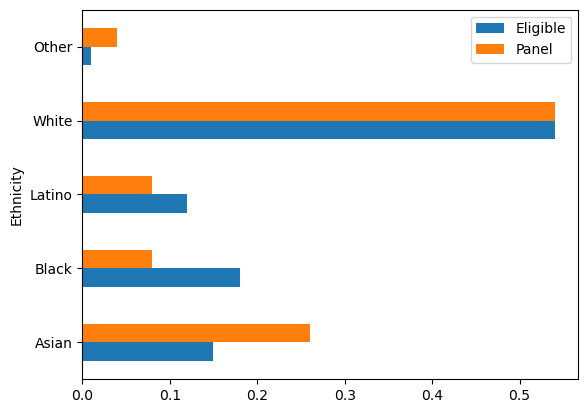

In [5]:
#Plotting horizontal bar chart for 'Eligible' and 'Panel' columns 

df.plot.barh(x='Ethnicity', y=['Eligible', 'Panel'])

In [6]:
#Appending a new column 'EP Difference' with the absolute difference between eligible and panel proportions

df['EP Difference'] = (df['Eligible'] - df['Panel']).abs()
df

,Ethnicity,Eligible,Panel,EP Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,0.10
2,Latino,0.12,0.08,0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


In [7]:
#Computing the observed statistic which is the total variation distance between eligible and panel proportions

observed_total_variance = df['EP Difference'].sum()/2
observed_total_variance

0.14

In [8]:
#Randomly picking one sample of size 1453
#Calculating the total variation distance between random proportions and eligible proportions

groups = df['Ethnicity']
total = 1453
prop = df['Eligible']

random_outcomes = np.random.choice(groups, total, p=prop)
asian_count = np.count_nonzero(random_outcomes=='Asian')
black_count = np.count_nonzero(random_outcomes=='Black')
latino_count = np.count_nonzero(random_outcomes=='Latino')
white_count = np.count_nonzero(random_outcomes=='White')
other_count = np.count_nonzero(random_outcomes=='Other')

sample_prop = np.array([asian_count, black_count, latino_count, white_count, other_count])/total
sample_prop

array([0.15829319, 0.17274604, 0.11218169, 0.54783207, 0.00894701])

In [9]:
#Appending a new column 'Random Sample Panel' with the random sample proportions

df['Random Sample Panel'] = sample_prop
df

,Ethnicity,Eligible,Panel,EP Difference,Random Sample Panel
0,Asian,0.15,0.26,0.11,0.158293
1,Black,0.18,0.08,0.10,0.172746
2,Latino,0.12,0.08,0.04,0.112182
3,White,0.54,0.54,0.00,0.547832
4,Other,0.01,0.04,0.03,0.008947


<Axes: ylabel='Ethnicity'>

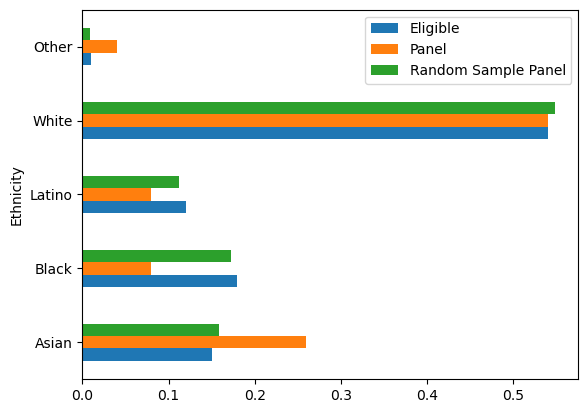

In [10]:
#Plotting horizontal bar chart for 'Eligible', 'Panel', and 'Random Sample Panel' columns 

df.plot.barh(x='Ethnicity', y=['Eligible', 'Panel', 'Random Sample Panel'])

In [11]:
#Appending a new column 'ER Difference' with the absolute difference between eligible and random proportions

df['ER Difference'] = (df['Eligible'] - df['Random Sample Panel']).abs()
df

,Ethnicity,Eligible,Panel,EP Difference,Random Sample Panel,ER Difference
0,Asian,0.15,0.26,0.11,0.158293,0.008293
1,Black,0.18,0.08,0.10,0.172746,0.007254
2,Latino,0.12,0.08,0.04,0.112182,0.007818
3,White,0.54,0.54,0.00,0.547832,0.007832
4,Other,0.01,0.04,0.03,0.008947,0.001053


In [12]:
#Computing the test statistic which is the total variation distance between eligible and random proportions for one sample

sample_total_variance = df['ER Difference'].sum() / 2
sample_total_variance

0.016125258086717102

In [14]:
#Performing simulation by picking 10,000 random samples of size 1453
#Calculating the total variation distance for each of the 10,000 samples

repetitions = 10000

outcomes = []

for i in np.arange(repetitions):
    random_outcomes = np.random.choice(groups, total, p=prop)
    asian_count = np.count_nonzero(random_outcomes=='Asian')
    black_count = np.count_nonzero(random_outcomes=='Black')
    latino_count = np.count_nonzero(random_outcomes=='Latino')
    white_count = np.count_nonzero(random_outcomes=='White')
    other_count = np.count_nonzero(random_outcomes=='Other')

    sample_prop = np.array([asian_count, black_count, latino_count, white_count, other_count])/total
    
    df['Random Sample Panel'] = sample_prop
    sample_dist = ((df['Eligible'] - df['Random Sample Panel']).abs().sum())/2
    outcomes.append(sample_dist)
    
outcomes = np.array(outcomes)

## LAB Exercise
Please complete the rest of the analysis with plotting histogram, observation and calculating the p value

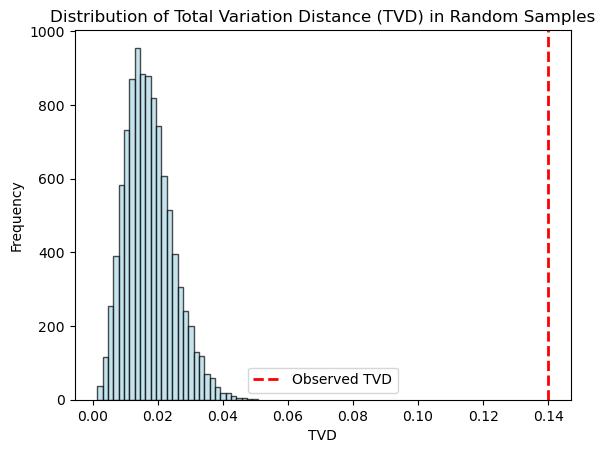

In [25]:
#Plotting a distribution of the test statistic which is the total variation distance
import matplotlib.pyplot as plt

plt.hist(outcomes, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_total_variance, color='red', linestyle='dashed', linewidth=2, label='Observed TVD')
plt.title('Distribution of Total Variation Distance (TVD) in Random Samples')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [24]:
#Plotting a distribution of the test statistic which is the total variation distance along with the observed statistic
# i included this in the first graph

In [28]:
#Computing the p-value to make the conclusion
p_value = np.count_nonzero(outcomes >= observed_total_variance) / repetitions

print(f'Observed TVD: {observed_total_variance:.4f}')
print(f'P-Value: {p_value:.4f}')

Observed TVD: 0.1400
P-Value: 0.0000


Does hypothesis need to rejected or not? Or in other words is there truly an underrepresentation? Answer below